In [15]:
!pip install folium
!pip install dash
import folium
import requests
import pandas as pd

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [436]:
!pip install dash

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 7.3 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 23.9 MB 27 kB/s  eta 0:00:01     |█████████████████████████▉      | 19.3 MB 1.8 MB/s eta 0:00:03
     |████████████████████████████████| 95 kB 352 kB/s eta 0:00:01
     |████████████████████████████████| 357 kB 450 kB/s eta 0:00:01
  Using cached click-8.0.3-py3-none-any.whl (97 kB)
     |████████████████████████████████| 288 kB 432 kB/s eta 0:00:01
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3801 sha256=82d7fd33a6bb1f8b2ab591a16769ea4e20d7

# Loading the data

In [16]:
list_provinces = ['nl', 'pe', 'ns', 'nb', 'qc', 'on', 'mb', 'sk', 'ab', 'bc', 'yt', 'nt', 'nu']


def download_legislators(province_name = "bc", gender = "M"):
    url = "https://goverlytics.p.rapidapi.com/division-legislators/ca/" + province_name + "?limit=150"


    querystring = {"gender":"M","is_active":"true"}

    headers = {
        'x-rapidapi-host': "goverlytics.p.rapidapi.com",
        'x-rapidapi-key': "212c957c59mshe712ce12fd7352fp18875djsn03a97ed3a159"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)
    
    response_dataframe = pd.DataFrame(response.json()["data"])
    
    return response_dataframe

def download_division_legislations(province_name = "bc"):
    
    url = "https://goverlytics.p.rapidapi.com/division-legislation/ca/" + province_name

    querystring = {"include_text":"true","include_actions":"true","include_votes":"true","include_summary":"true"}

    headers = {
        'x-rapidapi-host': "goverlytics.p.rapidapi.com",
        'x-rapidapi-key': "212c957c59mshe712ce12fd7352fp18875djsn03a97ed3a159"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)
    
    response_df = pd.DataFrame(response.json()["data"])
    
    return response_df

def download_federal_legislations():
    
    url = "https://goverlytics.p.rapidapi.com/federal-legislation/ca"

    querystring = {"sponsor_gender":"M","include_votes":"true","include_actions":"true","include_text":"true","include_summary":"true"}

    headers = {
        'x-rapidapi-host': "goverlytics.p.rapidapi.com",
        'x-rapidapi-key': "212c957c59mshe712ce12fd7352fp18875djsn03a97ed3a159"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)
    
    response_df = pd.DataFrame(response.json()["data"])
    
    return response_df
   
def download_federal_legislators():
    url = "https://goverlytics.p.rapidapi.com/federal-legislators/ca"

    querystring = {"is_active":"true","gender":"M"}

    headers = {
        'x-rapidapi-host': "goverlytics.p.rapidapi.com",
        'x-rapidapi-key': "212c957c59mshe712ce12fd7352fp18875djsn03a97ed3a159"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)
    
    response_df = pd.DataFrame(response.json()["data"])
    
    return response_df
    
#Download legislators
    
dict_division_legislators_male = dict([])

dict_division_legislators_female = dict([])

for e in list_provinces:
    response = download_legislators(e, "M")
    dict_division_legislators_male[e] = response
    
for e in list_provinces:
    diccio = dict([])
    response = download_legislators(e, "F")
    dict_division_legislators_female[e] = response
    
#Download legislations

dict_division_legislations = dict([])

dict_federal_legislations = dict([])

for e in list_provinces:
    diccio = dict([])
    response = download_division_legislations(e)
    dict_division_legislations[e] = response
    
df_federal_legislations = download_federal_legislations()

df_federal_legislators = download_federal_legislators()

# Loading federal legislators

In [54]:
url = "https://goverlytics.p.rapidapi.com/federal-legislators/ca"

def load_data(limit, page, gender = "M"):
    querystring = {"is_active":"true","gender":gender}

    headers = {
        'x-rapidapi-host': "goverlytics.p.rapidapi.com",
        'x-rapidapi-key': "212c957c59mshe712ce12fd7352fp18875djsn03a97ed3a159"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)
    
    return response


list_df_female = []

for page in range(10):
    list_df_female.append(pd.DataFrame(load_data(100, page, "F").json()["data"]))

list_df_male = []
for page in range(10):
    list_df_male.append(pd.DataFrame(load_data(90, page, "M").json()["data"]))

In [55]:
df_federal_legislators_male = pd.concat(list_df_male, axis=0)
print(df_federal_legislators_male.shape)

df_federal_legislators_female = pd.concat(list_df_female, axis = 0)
print(df_federal_legislators_female.shape)

(250, 34)
(250, 34)


In [56]:
df_federal_legislators_male.head()

,goverlytics_id,source_id,most_recent_term_id,date_collected,source_url,name_full,name_last,name_first,name_middle,name_suffix,...,military_experience,gender,wiki_url,is_active,province_territory_id,province_territory,region,riding,offices_roles_as_mp,parl_assoc_interparl_groups
0,40371,105854,2021,2021-10-21T15:48:44.614312,https://www.ourcommons.ca/members/en/taylor-ba...,Taylor Bachrach,Bachrach,Taylor,,,...,,M,https://en.wikipedia.org/wiki/Taylor_Bachrach,True,59,BC,British Columbia,Skeena—Bulkley Valley,[],[]
1,40719,,2021,2021-10-21T15:48:44.614312,https://sencanada.ca/en/senators/deacon-marty/,Marty Deacon,Deacon,Marty,,,...,,M,https://en.wikipedia.org/wiki/Martha_Deacon,True,35,ON,Ontario,,[],[]
2,40717,,2021,2021-10-21T15:48:44.614312,https://sencanada.ca/en/senators/dawson-dennis/,Dennis Dawson,Dawson,Dennis,,,...,,M,https://en.wikipedia.org/wiki/Dennis_Dawson,True,24,QC,Quebec,,[],[]
3,40391,25475,2021,2021-10-21T15:48:44.614312,https://www.ourcommons.ca/members/en/james-bez...,James Bezan,Bezan,James,,,...,,M,https://en.wikipedia.org/wiki/James_Bezan,True,46,MB,Prairies,Selkirk—Interlake—Eastman,[],"[{'role': 'Association Member', 'title': '', '..."
4,40401,104555,2021,2021-10-21T15:48:44.614312,https://www.ourcommons.ca/members/en/kody-bloi...,Kody Blois,Blois,Kody,,,...,,M,https://en.wikipedia.org/wiki/Kody_Blois,True,12,NS,Atlantic,Kings—Hants,[],[]


In [57]:
df_federal_legislators_female.head()

,goverlytics_id,source_id,most_recent_term_id,date_collected,source_url,name_full,name_last,name_first,name_middle,name_suffix,...,military_experience,gender,wiki_url,is_active,province_territory_id,province_territory,region,riding,offices_roles_as_mp,parl_assoc_interparl_groups
0,40704,,2021,2021-10-21T15:48:44.614312,https://sencanada.ca/en/senators/boyer-yvonne/,Yvonne Boyer,Boyer,Yvonne,,,...,,F,https://en.wikipedia.org/wiki/Yvonne_Boyer,True,35,ON,Ontario,,[],[]
1,40702,,,2021-10-21T15:48:44.614312,https://sencanada.ca/en/senators/boniface-gwen/,Gwen Boniface,Boniface,Gwen,,,...,,F,https://en.wikipedia.org/wiki/Gwen_Boniface,True,35,ON,Ontario,,[],[]
2,40736,,2021,2021-10-21T15:48:44.614312,https://sencanada.ca/en/senators/hartling-nancy/,Nancy J. Hartling,Hartling,Nancy,J.,,...,,F,https://en.wikipedia.org/wiki/Nancy_Hartling,True,13,NB,Atlantic,,[],[]
3,40368,88860,2021,2021-10-21T15:48:44.614312,https://www.ourcommons.ca/members/en/chandra-a...,Chandra Arya,Arya,Chandra,,,...,,F,https://en.wikipedia.org/wiki/Chandra_Arya,True,35,ON,Ontario,Nepean,[],[]
4,40477,87121,2021,2021-10-21T15:48:44.614312,https://www.ourcommons.ca/members/en/leah-gaza...,Leah Gazan,Gazan,Leah,,,...,,F,https://en.wikipedia.org/wiki/Leah_Gazan,True,46,MB,Prairies,Winnipeg Centre,[],[]


# Loading federal legislations

In [40]:
url = "https://goverlytics.p.rapidapi.com/federal-legislation/ca"

def load_data(limit, page, gender = "M"):
    querystring = {"include_summary":"true",
                   "include_text":"true",
                   "include_actions":"true",
                   "include_votes":"true",
                   "sponsor_gender": gender,
                   "limit": limit,
                   "page": page,
                  }

    headers = {
        'x-rapidapi-host': "goverlytics.p.rapidapi.com",
        'x-rapidapi-key': "4d08b76ec0msh553b06f36bc2c52p18a08ejsne688f7dc5de5"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response

response = load_data(90, 1)

list_df_female = []
for page in range(10):
    list_df_female.append(pd.DataFrame(load_data(90, page, "F").json()["data"]))

list_df_male = []
for page in range(10):
    list_df_male.append(pd.DataFrame(load_data(90, page, "M").json()["data"]))

In [42]:
df_federal_bills_male = pd.concat(list_df_male, axis=0)
print(df_bills_male.shape)

df_federal_bills_female = pd.concat(list_df_female, axis = 0)
print(df_bills_female.shape)

(282, 38)
(185, 38)


# Loading division legislations

In [414]:


def load_data(limit, page, province):
    
    url = "https://goverlytics.p.rapidapi.com/division-legislation/ca/" + province.lower()
    
    querystring = {"include_text":"true","include_actions":"true","include_votes":"true","include_summary":"true", "page": page}

    headers = {
        'x-rapidapi-host': "goverlytics.p.rapidapi.com",
        'x-rapidapi-key': "212c957c59mshe712ce12fd7352fp18875djsn03a97ed3a159"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)
    
    return response

list_provinces = ['AB', 'BC', 'MB', 'NB', 'NL', 'NT', 'NS', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']

df_division_legislations_list = []

for e in list_provinces:
    if e:
        for page in range(10):
            df_division_legislations_list.append(pd.DataFrame(load_data(90, page, e).json()["data"]))


In [415]:
df_division_legislations = pd.concat(df_division_legislations_list, axis= 0)



In [70]:
df_division_legislations.columns

Index(['goverlytics_id', 'source_id', 'bill_name', 'session',
       'date_introduced', 'source_url', 'chamber_origin', 'committees',
       'bill_type', 'bill_title', 'country_id', 'country', 'current_status',
       'principal_sponsor_id', 'principal_sponsor', 'sponsors', 'sponsors_id',
       'cosponsors', 'cosponsors_id', 'bill_description', 'source_topic',
       'topic', 'province_territory_id', 'province_territory', 'actions',
       'bill_summary', 'bill_text', 'votes'],
      dtype='object')

# Loading division legislators

In [408]:
def load_data(limit, page, province):
    
    url = "https://goverlytics.p.rapidapi.com/division-legislators/ca/" + province.lower()
    
    querystring = {"is_active":"true","page": page}

    headers = {
        'x-rapidapi-host': "goverlytics.p.rapidapi.com",
        'x-rapidapi-key': "212c957c59mshe712ce12fd7352fp18875djsn03a97ed3a159"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)
    
    return response

list_provinces = ['AB', 'BC', 'MB', 'NB', 'NL', 'NT', 'NS', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']

df_division_legislators_list = []

for e in list_provinces:
    if e:
        for page in range(10):
            df_division_legislators_list.append(pd.DataFrame(load_data(90, page, e).json()["data"]))


""


In [409]:
df_division_legislators = pd.concat(df_division_legislators_list, axis= 0)


In [86]:
df_division_legislators.province_territory

0     AB
1     AB
2     AB
3     AB
4     AB
      ..
14    YT
15    YT
16    YT
17    YT
18    YT
Name: province_territory, Length: 3100, dtype: object

# Study of gender

In [103]:
list_provinces = ['AB', 'BC', 'MB', 'NB', 'NL', 'NT', 'NS', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']


name_provinces = ["Alberta", "British Columbia", "Manitoba", "New Brunswick", "Newfoundland and Labrador",
                  "Northwest Territories", "Nova Scotia", "Nunavut", "Ontario", "Prince Edward Island",
                  "Quebec", "Saskatchewan", "Yukon"]

In [410]:
for e in list_provinces:
    print(len(df_division_legislators[(df_division_legislators["province_territory"] == e)]))



112
112
82
75
65
38
99
44
149
51
150
86
38


In [411]:

number_of_female = []

for e in list_provinces:
    male = df_division_legislators[(df_division_legislators["province_territory"] == e) & (df_division_legislators["gender"]=="M")]
    female = df_division_legislators[(df_division_legislators["province_territory"] == e) & (df_division_legislators["gender"]=="F")]
    number_of_female.append(len(female)/(len(male)+len(female)))

In [390]:
male = df_division_legislators[(df_division_legislators["province_territory"] == "ON") & (df_division_legislators["gender"]=="M")]
female = df_division_legislators[(df_division_legislators["province_territory"] == "ON") & (df_division_legislators["gender"]=="F")]

print((len(male)+len(female)))

250


In [94]:
number_of_female

[0.16,
 0.44,
 0.2,
 0.20833333333333334,
 0.16,
 0.5263157894736842,
 0.43478260869565216,
 0.2,
 0.24,
 0.28,
 0.52,
 0.28,
 0.42105263157894735]

In [427]:
import matplotlib.pyplot as plt


def pie_chart(province, province_number):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Female', 'Male'
    sizes = [100*number_of_female[province_number], 100*(1-number_of_female[province_number])]
    explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title("Legislators "+ province,fontweight="bold")
    fig = plt.gcf()
    fig.set_size_inches(4,2)
    plt.savefig(province+'.png')
    plt.show()

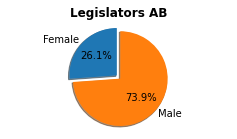

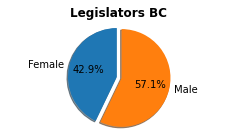

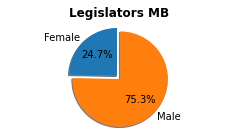

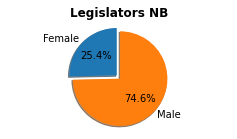

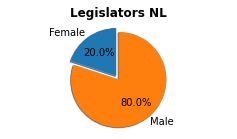

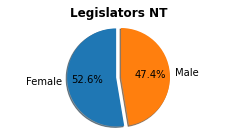

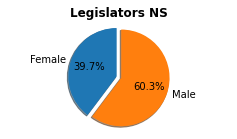

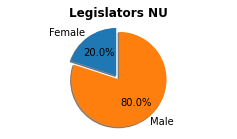

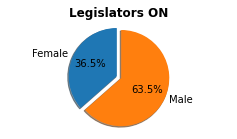

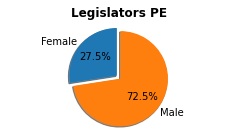

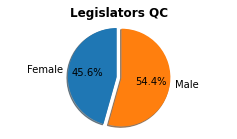

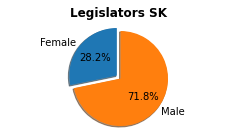

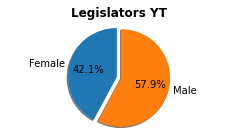

In [428]:
for province, i in zip(list_provinces, range(len(list_provinces))):
    pie_chart(province, i)

# Study by bills passed

In [237]:
from collections import Counter
import seaborn as sns

list_provinces = ['AB', 'BC', 'MB', 'NB', 'NL', 'NT', 'NS', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']


name_provinces = ["Alberta", "British Columbia", "Manitoba", "New Brunswick", "Newfoundland and Labrador",
                  "Northwest Territories", "Nova Scotia", "Nunavut", "Ontario", "Prince Edward Island",
                  "Quebec", "Saskatchewan", "Yukon"]

contar = Counter(df_division_legislations[df_division_legislations["province_territory"]=="AB"].topic)

contar['']

110

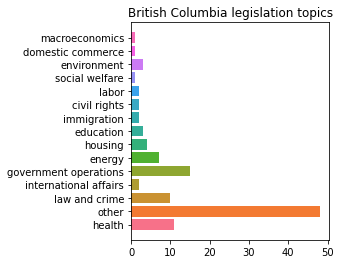

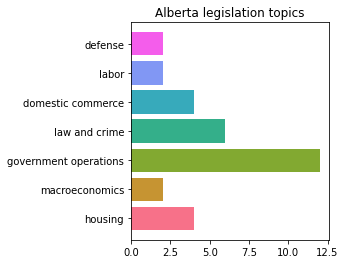

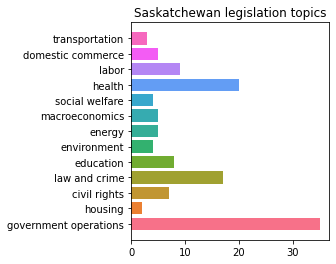

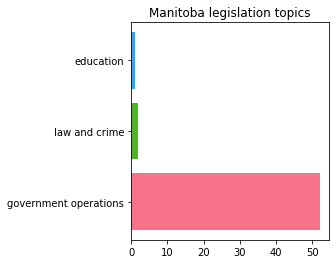

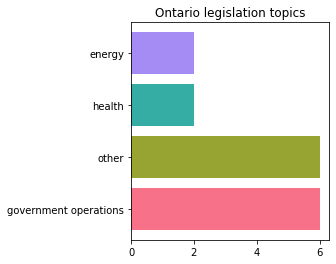

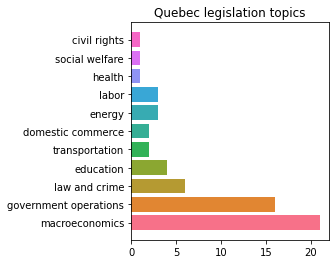

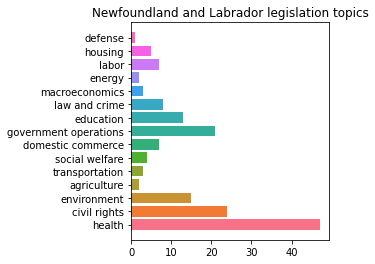

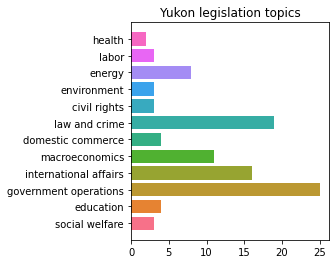

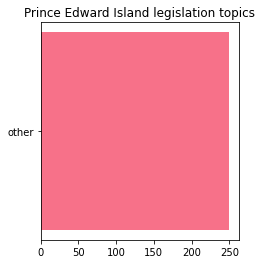

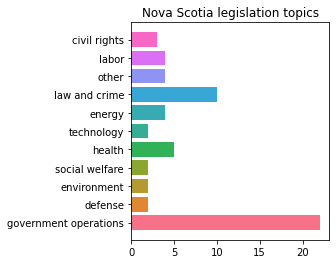

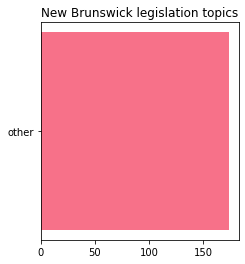

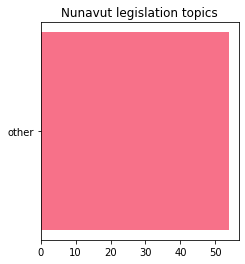

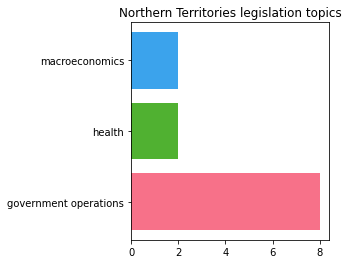

In [429]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def clean_dict(diccio):
    nuevo_diccio = dict([])
    for e in diccio.keys():
        if e == '':
            nuevo_diccio['other'] = diccio['']
        else:
            nuevo_diccio[e] = diccio[e]
    return nuevo_diccio

def histogram(province):
    contar = Counter(df_division_legislations[df_division_legislations["province_territory"]==province].topic)
    contar = clean_dict(contar)
    
    ind = np.arange(len(contar))
    palette = sns.color_palette("husl", len(contar))

    plt.barh(ind, list(contar.values()), color=palette)
    plt.yticks(ind, list(contar.keys()))
    plt.title(name_provinces[i] + ' legislation topics')
    plt.gcf().subplots_adjust(left=0.35)
    fig = plt.gcf()
    fig.set_size_inches(5,4)
    plt.savefig(province+'_topics''.png')
    plt.show()
    
for i in range(len(name_provinces)):
    histogram(list_provinces[i])

# Analysis by parties

In [302]:
df_division_legislators[df_division_legislators["province_territory"]=="BC"].head()

,goverlytics_id,source_id,most_recent_term_id,date_collected,source_url,name_full,name_last,name_first,name_middle,name_suffix,...,occupation,education,military_experience,gender,wiki_url,is_active,province_territory_id,province_territory,region,riding
0,18554,,42nd-Parliament,2021-10-19T20:12:24.989898,https://www.leg.bc.ca/learn-about-us/members/4...,Hon. Harry Bains,Bains,Harry,,,...,[],[],,M,https://en.wikipedia.org/wiki/Harry_Bains,True,59,BC,British Columbia,Surrey-Newton
1,18551,,42nd-Parliament,2021-10-19T20:12:24.989898,https://www.leg.bc.ca/learn-about-us/members/4...,Dan Ashton,Ashton,Dan,,,...,[],[],,M,https://en.wikipedia.org/wiki/Dan_Ashton,True,59,BC,British Columbia,Penticton
2,18552,,42nd-Parliament,2021-10-19T20:12:24.989898,https://www.leg.bc.ca/learn-about-us/members/4...,Michele Babchuk,Babchuk,Michele,,,...,[],[],,F,https://en.wikipedia.org/wiki/Michele_Babchuk,True,59,BC,British Columbia,North Island
3,18553,,42nd-Parliament,2021-10-19T20:12:24.989898,https://www.leg.bc.ca/learn-about-us/members/4...,Brenda Bailey,Bailey,Brenda,,,...,[Businesswoman],[],,F,https://en.wikipedia.org/wiki/Brenda_Bailey,True,59,BC,British Columbia,Vancouver-False Creek
4,18556,,42nd-Parliament,2021-10-19T20:12:24.989898,https://www.leg.bc.ca/learn-about-us/members/4...,Hon. Lisa Beare,Beare,Lisa,,,...,[],"[{'field': '', 'level': '', 'school': 'Univers...",,F,https://en.wikipedia.org/wiki/Lisa_Beare,True,59,BC,British Columbia,Maple Ridge-Pitt Meadows


In [283]:
#df_division_legislations[df_division_legislators["province_territory"]=="AB"].columns
for e in list_provinces:
    contar = Counter(df_division_legislators[df_division_legislators["province_territory"]==e].party)
    print(contar)

Counter({'United Conservative': 220, 'New Democratic': 30})
Counter({'New Democratic': 190, 'Liberal': 60})
Counter({'Progressive Conservative': 180, 'New Democratic': 60, 'Liberal': 10})
Counter({'Progressive Conservative': 130, 'Liberal': 90, "People's Alliance": 10, 'Green': 10, '': 10})
Counter({'Liberal': 110, 'Progressive Conservative': 100, 'New Democratic': 20, 'Independent': 20})
Counter({'Consensus Government': 190})
Counter({'Progressive Conservative': 120, 'Liberal': 90, 'New Democratic': 40})
Counter({'Consensus Government': 220})
Counter({'Progressive Conservative': 140, 'New Democratic': 90, 'Independent': 10, 'Liberal': 10})
Counter({'Progressive Conservative': 130, 'Green': 80, 'Liberal': 40})
Counter({'Coalition Avenir Québec': 200, 'Liberal': 40, 'Parti Québécois': 10})
Counter({'Saskatchewan Party': 220, 'New Democratic': 30})
Counter({'Yukon Party': 80, 'Liberal': 80, 'New Democratic': 30})


In [430]:
def pie_chart_2(province):

    contar = Counter(df_division_legislators[df_division_legislators["province_territory"]==province].party)
    
    # Data to plot
    labels = []
    sizes = []

    for x, y in contar.items():
        labels.append(x)
        sizes.append(y)
    #explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
    # Plot
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title("Parties "+ province,fontweight="bold")
    fig = plt.gcf()
    fig.set_size_inches(4,2)
    plt.savefig(province+'.png')
    plt.show()

In [423]:
df_division_legislators[df_division_legislators["province_territory"]=="NT"].name_last

0         Semmler
1          Chinna
2       Martselos
3            Norn
4         Nokleby
5     Bonnetrouge
6       Cleveland
7       Armstrong
8        Thompson
9        Jacobson
10       Cochrane
11          Blake
12        Johnson
13       Wawzonek
14        Simpson
15         Archie
16       O'Reilly
17        Simpson
18          Green
0         Semmler
1          Chinna
2       Martselos
3            Norn
4         Nokleby
5     Bonnetrouge
6       Cleveland
7       Armstrong
8        Thompson
9        Jacobson
10       Cochrane
11          Blake
12        Johnson
13       Wawzonek
14        Simpson
15         Archie
16       O'Reilly
17        Simpson
18          Green
Name: name_last, dtype: object

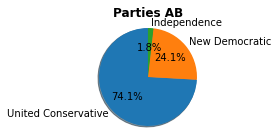

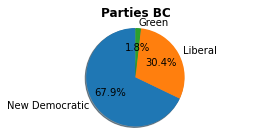

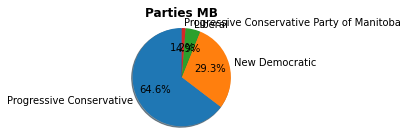

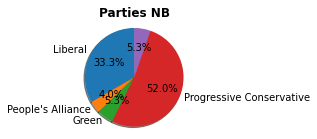

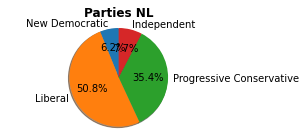

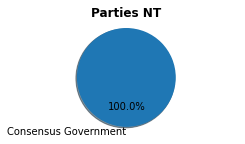

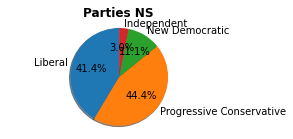

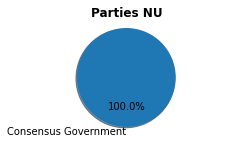

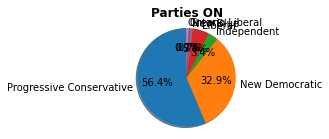

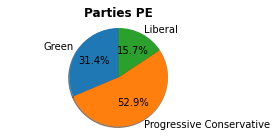

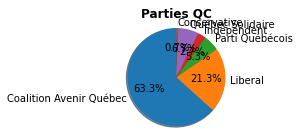

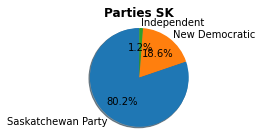

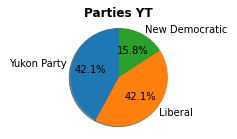

In [431]:
for e in list_provinces:
    pie_chart_2(e)

# Analysis by time of bills

In [419]:
from datetime import datetime
        
def average_bill_time(province):
    suma = 0
    long = 0
    for e in df_division_legislations[df_division_legislations["province_territory"]==province].actions:
        
        if e and e[0]['date'] and e[-1]['date']:
            
            d1 = datetime.strptime(e[0]['date'][:10], "%Y-%m-%d")
            d2 = datetime.strptime(e[-1]['date'][:10], "%Y-%m-%d")
            suma = suma + (d1-d2).days
            long = long + 1
            
    if long == 0:
        print("No data for "+province)
    else:        
        return abs(suma / long)



In [420]:
for e in list_provinces:
    print(average_bill_time(e))

58.15384615384615
No data for BC
None
No data for MB
None
No data for NB
None
0.0
42.88333333333333
9.654320987654321
52.95049504950495
44.592
31.066666666666666
82.10303030303031
37.574074074074076
9.166666666666666


# Putting all together

In [434]:
import folium
import base64

name_provinces = ["British Columbia","Alberta",
"Saskatchewan",
"Manitoba",
"Ontario",
"Quebec",
"Newfoundland and Labrador",
"Yukon",
"Prince Edward Island",
"Nova Scotia",
"New Brunswick",
"Nunavut",
"Northern Territories"]

list_provinces = ['AB', 'BC', 'MB', 'NB', 'NL', 'NT', 'NS', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']

canada = folium.Map(
                    location=[58.084167, -99.959314],
                    zoom_start = 3
                )

locations = [[55.639358, -125.340063],[55.436645, -114.177669],
[55.149194, -105.988562],
[55.222793, -97.115573],
[51.008623, -86.090106],
[52.069473, -71.427672],
[53.400751, -60.730773],
[64.245580, -136.177762],
[46.389358, -63.302173],
[45.273052, -63.035154], 
[46.648582, -66.396753],
[66.372019, -94.719900],
[64.042750, -116.565396]]

for i in range(len(name_provinces)):
    encoded = base64.b64encode(open(list_provinces[i] + '/' + list_provinces[i] + '_merged'+ '.png', 'rb').read())
    html = '<img src="data:image/png;base64,{}">'.format
    iframe = folium.IFrame(html(encoded.decode('UTF-8')), width=400, height=200)
    popup = folium.Popup(iframe, max_width=400)
    folium.Marker(location=locations[i], tooltip=html, popup = popup, icon=folium.Icon(color = 'gray')).add_to(canada)


canada

# Dash

In [437]:
app = Dash(__name__)

NameError: name 'Dash' is not defined